In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

year = 2012

In [163]:
# Functions to load data

def load_countries_data(infile_name):   
    data = pd.read_csv(infile_name,sep=',',header=0)
    df = pd.DataFrame(data)
    return df
    
def load_gdp_data(infile_name):   
    data = pd.read_csv(infile_name,sep=',',header=0,index_col='gdp pc test')
    df = pd.DataFrame(data).transpose()
    df = df.dropna(axis=1)
    return df

In [164]:
# Function to plot income per person across all countries 

def plot_gdp_data(gdp_data,year):
    data = gdp_data.loc[str(year)]
    plot = plt.hist(data,bins=50)
    plt.title('Income Per Person in ' + str(year))
    plt.xlabel('Income Per Person in $')
    plt.ylabel('# of Countries')
    return plot

In [165]:
# Function to merge countries and gdp data

def merge_by_year(countries_data,gdp_data,year):
    gdp_data = gdp_data.loc[str(year)]
    gdp_data = pd.DataFrame(gdp_data)
    gdp_data.reset_index(level=0, inplace=True)
    gdp_data.rename(columns={'gdp pc test': 'Country',str(year):'Income'},inplace=True)
    merged_data = pd.merge(countries_data,gdp_data,on='Country',how='outer')
    merged_data = merged_data.dropna()
    return merged_data

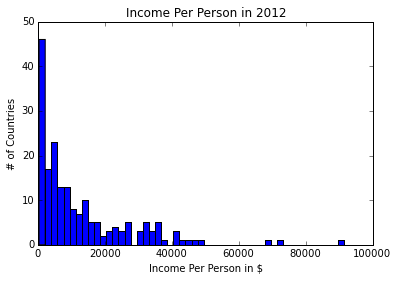

In [166]:
# Distribution of income per person across all countries in the world for the given year
fig1 = plot_gdp_data(income,year)

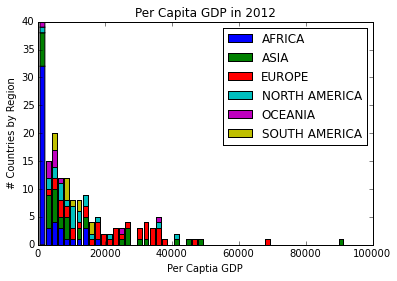

In [167]:
# Explore distribution of income per person by region 
countries = load_countries_data('countries.csv')
income = load_gdp_data('indicator gapminder gdp_per_capita_ppp/Data-Table 1.csv')
merged_data = merge_by_year(countries,income,year)

income_data = merged_data['Income']
regions = np.unique(merged_data[['Region']])
income_list = []
for i in regions:
    income_list.append(merged_data[merged_data['Region']==i]['Income'])
    
plt.hist(income_list,stacked=True, bins=50, label=list(regions))
plt.ylabel('# Countries by Region')
plt.xlabel('Per Captia GDP')
plt.title('Per Capita GDP in %d' %year)
plt.legend()
plt.savefig('hist_gdp_by_region_{}.png'.format(year))
   

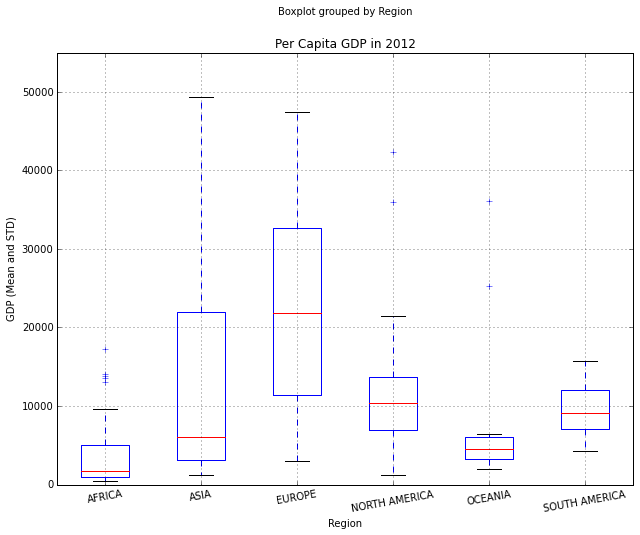

In [168]:
# boxplot by region
merged_data.boxplot(column='Income', by='Region', rot='10', figsize=(10,8))
plt.title('Per Capita GDP by Region in {}'.format(year))
plt.ylabel('GDP (Mean and STD)')
plt.xlabel('Region')
plt.title('Per Capita GDP in %d' %year)
plt.ylim(0,55000)
plt.savefig('box_gdp_by_region_{}.png'.format(year))